# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import shuffle
import os

import tensorflow as tf
from tensorflow import keras

# Reading the images and storing them in an efficient way

In [2]:
def check_saved_data():
    if not os.path.isdir('processed_data'): 
        os.mkdir('processed_data')
        
    if not os.path.isfile('train_data.npy'): 
        read_raw_data()
        
    if not os.path.isfile('train_target.npy'):
        read_raw_target_data()

        
def read_raw_data():
    path = os.path.join('Dataset', 'train.csv')
    file_df = pd.read_csv(path)
    
    file_list = file_df['filename']
    
    path = os.path.join('Dataset', 'Images', 'train')
    file_list = list(path + '/' + file_list)
    
    x = np.array([np.array(Image.open(fname)) for fname in file_list])
    path = os.path.join('processed_data','train_data')
    np.save(path, x)
    
    
def read_raw_target_data():
    path = os.path.join('Dataset','train.csv')
    file_df = pd.read_csv(path)
    
    y = np.array(file_df['label'])
    path = os.path.join('processed_data', 'train_target')
    np.save(path, y)

In [3]:
check_saved_data()

In [4]:
path = os.path.join('processed_data', 'train_data.npy')
X_train_full = np.load(path)

path = os.path.join('processed_data', 'train_target.npy')
y_train_full = np.load(path)

In [5]:
X_train_full.shape

(49000, 28, 28, 4)

In [6]:
X_train_full = X_train_full[:, :, :, 0].copy()

In [7]:
X_train_full.shape

(49000, 28, 28)

# Preprocessing the data

In [8]:
X_train_full = X_train_full / 255.

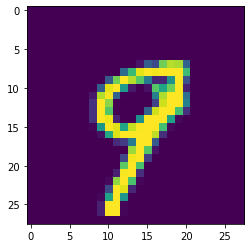

9

In [9]:
index = 600
plt.imshow(X_train_full[index])
plt.show()

y_train_full[index]

# Train-Validation Split

In [10]:
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_train.shape

(44000, 28, 28)

In [13]:
X_train, y_train = shuffle(X_train, y_train, random_state=40)

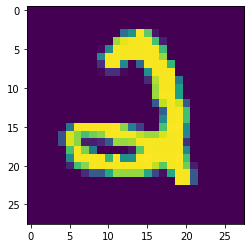

2

In [14]:
index = 550
plt.imshow(X_train[index])
plt.show()
y_train[index]

# Deep Learning

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 994,610
Trainable params: 994,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
1375/1375 [==============================] - 3s 2ms/step - loss: 0.6417 - accuracy: 0.8332 - val_loss: 0.3150 - val_accuracy: 0.9112
Epoch 2/30
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2715 - accuracy: 0.9218 - val_loss: 0.2470 - val_accuracy: 0.9278
Epoch 3/30
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2159 - accuracy: 0.9383 - val_loss: 0.2058 - val_accuracy: 0.9436
Epoch 4/30
1375/1375 [==============================] - 2s 1ms/step - loss: 0.1790 - accuracy: 0.9482 - val_loss: 0.1860 - val_accuracy: 0.9460
Epoch 5/30
1375/1375 [==============================] - 2s 1ms/step - loss: 0.1517 - accuracy: 0.9569 - val_loss: 0.1630 - val_accuracy: 0.9526
Epoch 6/30
1375/1375 [==============================] - 2s 1ms/step - loss: 0.1317 - accuracy: 0.9629 - val_loss: 0.1471 - val_accuracy: 0.9564
Epoch 7/30
1375/1375 [==============================] - 2s 2ms/step - loss: 0.1150 - accuracy: 0.9672 - val_loss: 0.1362 - val_accuracy:

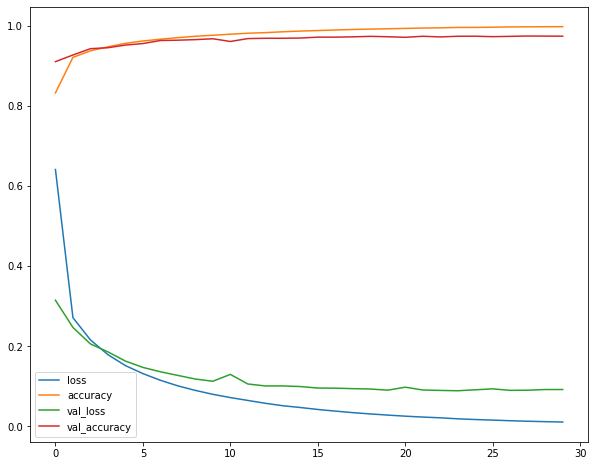

In [19]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.show()

In [20]:
if not os.path.isdir('model'):
    os.mkdir('model')
    
    
path = os.path.join('model', 'ann_model.h5')
model.save(path)

In [21]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9748


[0.09187909215688705, 0.9747999906539917]

# Prediction on Test Data

In [22]:
def read_test_data(test_dir):
    test_file_path = glob.glob(f'{test_dir}/*.png')
    
    
    test_data = np.array([np.array(Image.open(fname)) for fname in test_file_path])
    if not os.path.isdir('processed_data'):
        os.mkdir('processed_data')
        
    path = os.path.join('processed_data', 'test_data')
    np.save(path, test_data)
    

TEST_DIR = os.path.join('Dataset', 'Images', 'test')
read_test_data(TEST_DIR)

In [23]:
path = os.path.join('processed_data', 'test_data.npy')
X_test = np.load(path)
X_test = X_test[:, :, :, 0].copy()
X_test = X_test / 255.

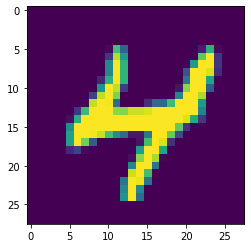

In [24]:
plt.imshow(X_test[0])

In [25]:
path = os.path.join('model', 'ann_model.h5')
model = keras.models.load_model(path)

In [26]:
pred = model.predict(X_test)
np.argmax(pred, axis=1)

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)

In [27]:
os.path.join('Dataset', 'Images', 'test')

'Dataset\\Images\\test'

# Saving the predictions in a structured csv format

In [28]:
def save_output_data(pred):
    path = os.path.join('Dataset', 'Images', 'test')
    os.chdir(path)
    
    output = pd.DataFrame(glob.glob('*.png'), columns=['filename'])
    output['label'] = np.argmax(pred, axis=1)
    
    os.chdir('../../../')
    
    if not os.path.isdir('output'):
        os.makedirs('output')
    output.to_csv('output/output.csv', index=False)

save_output_data(pred)